<a href="https://colab.research.google.com/github/ambideXtrous9/All-Sklearn-Classifiers-on-Titanic-Dataset/blob/main/Titanic_Classifier_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --quiet scikit-learn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

-------------------------


# **Loading Dataset**

In [4]:
path = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

In [5]:
df = pd.read_csv(path)

In [6]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## **Statistics of the Dataset**

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## **Checking Null Values**

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## **Replacing Null Values**

In [9]:
df['Age'].fillna(df['Age'].median(), inplace = True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)
df['Fare'].fillna(df['Fare'].median(), inplace = True)

## **Dropping Unnecessary columns**

In [10]:
drop_column = ['PassengerId','Cabin', 'Ticket','Name']
df.drop(drop_column, axis=1, inplace = True)

In [11]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [13]:
df.shape

(891, 8)

## **Transforming Categorical Columns using LabelEncoder()**

In [14]:
label = LabelEncoder()
df['Sex'] = label.fit_transform(df['Sex'])
df['Embarked'] = label.fit_transform(df['Embarked'])

In [15]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
5,0,3,1,28.0,0,0,8.4583,1
6,0,1,1,54.0,0,0,51.8625,2
7,0,3,1,2.0,3,1,21.0750,2
8,1,3,0,27.0,0,2,11.1333,2
9,1,2,0,14.0,1,0,30.0708,0


# **Differnt EDA on the Dataset**

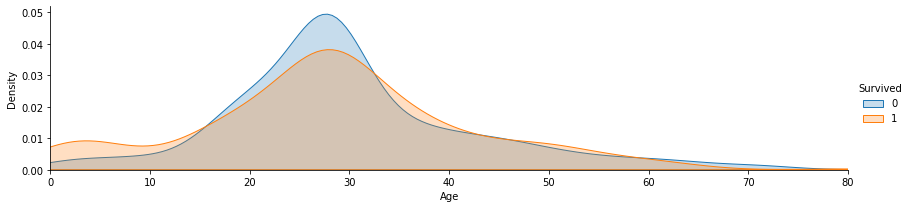

In [16]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
 
plt.show() 

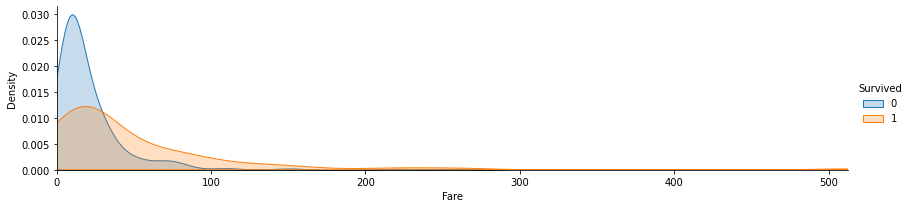

In [17]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, df['Fare'].max()))
facet.add_legend()
 
plt.show()  

Text(0.5, 1.0, 'Pclass vs Age Survival Comparison')

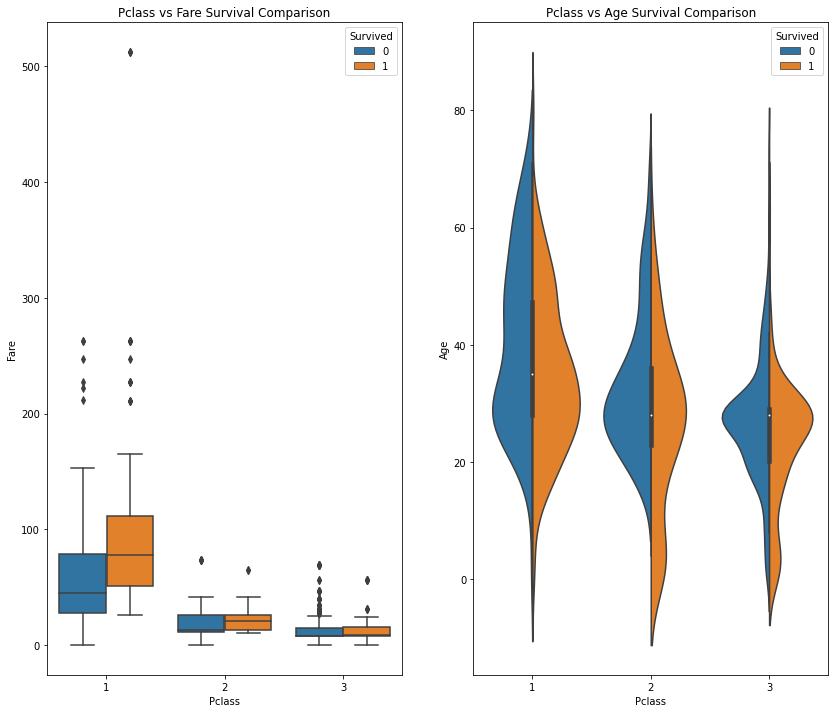

In [18]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(14,12))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = df, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = df, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

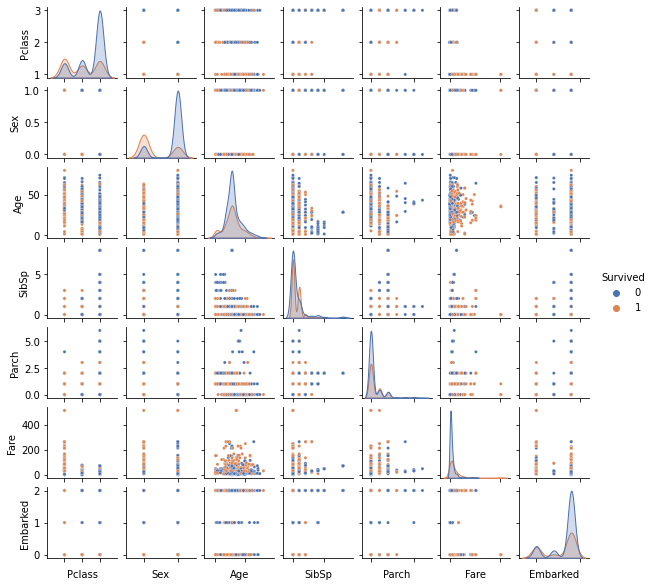

In [19]:
pp = sns.pairplot(df, hue = 'Survived', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

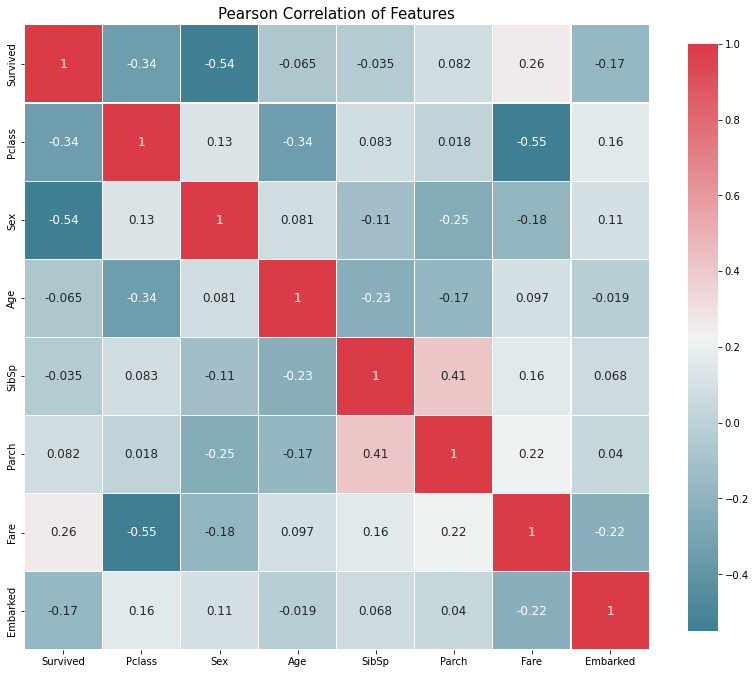

In [20]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

In [21]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

# **Separating Independent and Target Variables**

In [22]:
y = df['Survived']
x = df.drop(['Survived'], axis=1) 

In [23]:
x.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
5,3,1,28.0,0,0,8.4583,1
6,1,1,54.0,0,0,51.8625,2
7,3,1,2.0,3,1,21.0750,2
8,3,0,27.0,0,2,11.1333,2
9,2,0,14.0,1,0,30.0708,0


# **Train-Test Split**

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x,y ,random_state=104, test_size=0.10,stratify=y,shuffle=True)

# **Classifiers and Training**

In [26]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

In [27]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

classifiers = [
    KNeighborsClassifier(),
    SVC(probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("-"*30)
    print(name)
    
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("-"*30)

------------------------------
KNeighborsClassifier
Accuracy: 71.1111%
Log Loss: 0.8598102618377376
------------------------------
SVC
Accuracy: 65.5556%
Log Loss: 0.6255405372743209
------------------------------
NuSVC
Accuracy: 83.3333%
Log Loss: 0.40928452536988347
------------------------------
DecisionTreeClassifier
Accuracy: 81.1111%
Log Loss: 6.161848138529182
------------------------------
RandomForestClassifier
Accuracy: 82.2222%
Log Loss: 0.4076266615700828
------------------------------
AdaBoostClassifier
Accuracy: 82.2222%
Log Loss: 0.6725605708222944
------------------------------
GradientBoostingClassifier
Accuracy: 85.5556%
Log Loss: 0.32968473792322606
------------------------------
GaussianNB
Accuracy: 84.4444%
Log Loss: 0.5232507362481738
------------------------------
LinearDiscriminantAnalysis
Accuracy: 83.3333%
Log Loss: 0.3585645387524448
------------------------------
QuadraticDiscriminantAnalysis
Accuracy: 84.4444%
Log Loss: 0.48551482787348393
-----------------

# **Accuracy and Loss Plot**

In [28]:
log.sort_values(by = ['Log Loss'], ascending = True, inplace = True)

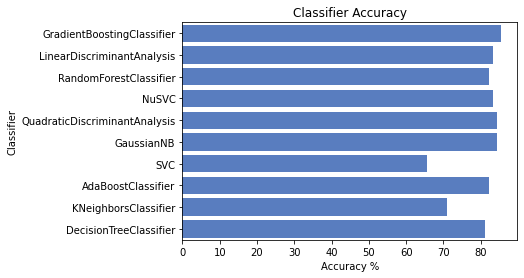

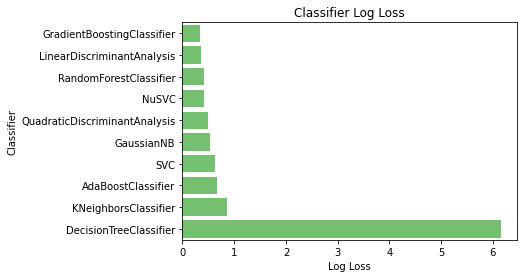

In [29]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

# **Choosing the Best Classifer**

In [30]:
favorite_clf = LinearDiscriminantAnalysis()
favorite_clf.fit(X_train, y_train)
test_predictions = favorite_clf.predict(X_test)

# **Calculating Precision,Recall,F1-score and Confusion Matrix**

In [31]:
from sklearn.metrics import precision_recall_fscore_support as score

In [32]:
precision, recall, fscore, support = score(y_test, test_predictions)

In [33]:
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.83333333 0.83333333]
recall: [0.90909091 0.71428571]
fscore: [0.86956522 0.76923077]
support: [55 35]


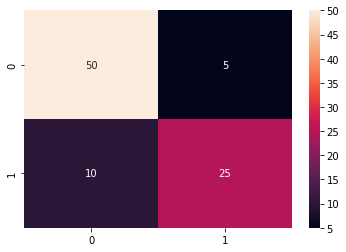

In [34]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, test_predictions)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

# **Stacking Classifiers**

In [35]:
from sklearn.ensemble import StackingClassifier

In [36]:
import xgboost as xgb

In [39]:
classifiers = [
    ('knn',KNeighborsClassifier()),
    ('svc',SVC(probability=True)),
    ('nusvc',NuSVC(probability=True)),
    ('xgb_cl',xgb.XGBClassifier()),
    ('DT',DecisionTreeClassifier()),
    ('RFC',RandomForestClassifier()),
    ('AdaB',AdaBoostClassifier()),
    ('GdB',GradientBoostingClassifier()),
    ('NB',GaussianNB()),
    ('LDA',LinearDiscriminantAnalysis()),
    ('QDA',QuadraticDiscriminantAnalysis())]

In [40]:
clf = StackingClassifier(estimators=classifiers, final_estimator=xgb.XGBClassifier())

In [41]:
clf.fit(X_train, y_train)
test_predictions = clf.predict(X_test)

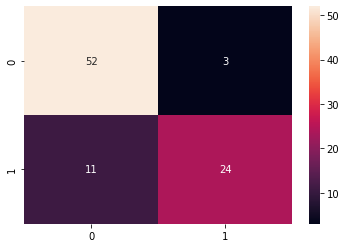

In [42]:
cf_matrix = confusion_matrix(y_test, test_predictions)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

# **Using K-Fold Cross Validation**


In [43]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
#Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    XGBClassifier()    
    ]


In [44]:
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .2, train_size = .8, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%


In [45]:
#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

In [46]:

def Model_train(x,y):
  row_index = 0
  for alg in MLA:
      #set name and parameters
      MLA_name = alg.__class__.__name__
      MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
      MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
      
      cv_results = model_selection.cross_validate(alg, x, y, cv = cv_split,return_train_score=True)

      MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
      MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
      MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
      #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
      MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
      

      #save MLA predictions - see section 6 for usage
      # alg.fit(data1[data1_x_bin], data1[Target])
      # MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
      
      row_index+=1

      
  #print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
  MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
#MLA_predict


In [47]:
Model_train(x,y)

# **Accuracies of different Classifiers in sorted order**

In [48]:
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
19,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.878371,0.83743,0.074369,0.040387
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.899017,0.83743,0.080882,0.112399
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.982163,0.821788,0.07361,0.175509
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.833989,0.813408,0.069588,0.09294
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.965309,0.812849,0.078342,0.027534
18,QuadraticDiscriminantAnalysis,"{'priors': None, 'reg_param': 0.0, 'store_cova...",0.805758,0.806145,0.084483,0.002474
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.801264,0.805028,0.057791,0.604975
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.982303,0.803911,0.070888,0.134092
17,LinearDiscriminantAnalysis,"{'covariance_estimator': None, 'n_components':...",0.79986,0.797765,0.069427,0.003457
10,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.789747,0.796648,0.084533,0.002482


# **Classifier vs Accuracy Plot**

Text(0, 0.5, 'Algorithm')

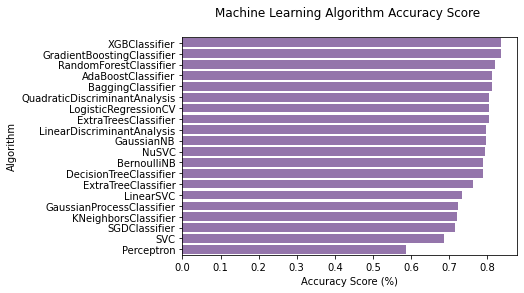

In [49]:
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')